# **1 - Model Inference**

---



The trained model will be tested on data that does not belong to the train-set, val-set, or test-set. This data must be in its original format, not scaled data.

## 1.1 Import Libraries

In [46]:
# Import libraries
import pickle
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from PIL import Image

## 1.2 Load the model

In [2]:
# Load the model
impSequential = load_model('imp_model.h5')

##1.3 Model Inference

In this part of the inference model, I randomly take url links from various sources and enter them into the inference model.

In [21]:
#Downloading the image
!curl https://www.butchartgardens.com/wp-content/uploads/2018/05/DSC_9879-735x490.jpg --output predict1.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  113k  100  113k    0     0   258k      0 --:--:-- --:--:-- --:--:--  258k


In [19]:
#Downloading the image
!curl https://cdn.britannica.com/30/128430-050-D6578398/Boston-Public-Garden.jpg --output predict2.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  371k  100  371k    0     0  3344k      0 --:--:-- --:--:-- --:--:-- 3344k


In [33]:
# Downloading the image
!curl https://img.antaranews.com/cache/730x487/2021/03/07/Kebakaran-di-Pakan-Dalam-Daha-Utara.jpg --output predict3.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 50974  100 50974    0     0  35821      0  0:00:01  0:00:01 --:--:-- 35821


In [43]:
# Downloading the image
!curl https://bnpb.go.id/storage/app/media/uploads/24/kebakaran-sebanagau-1.jpg --output predict4.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  378k  100  378k    0     0   138k      0  0:00:02  0:00:02 --:--:--  138k


In [35]:
# Downloading the image
!curl https://images.bisnis.com/posts/2021/07/30/1423796/turki-kebakaran.jpg --output predict5.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 87250    0 87250    0     0   990k      0 --:--:-- --:--:-- --:--:--  990k


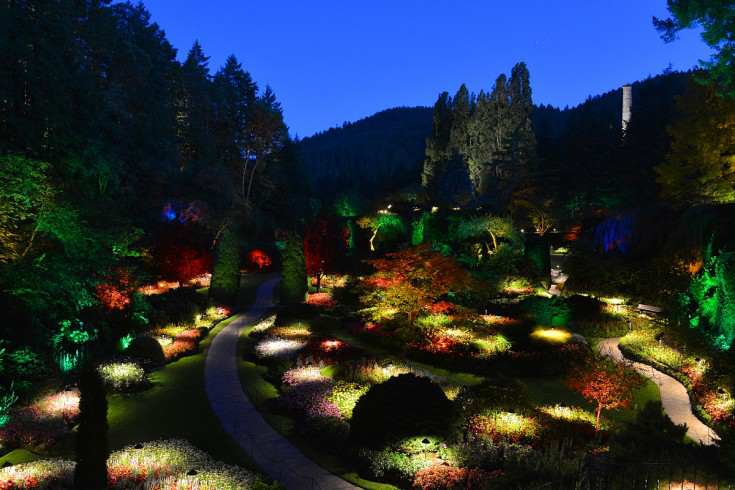

In [23]:
# load the img1
img1 = image.load_img('predict1.jpg')
img1

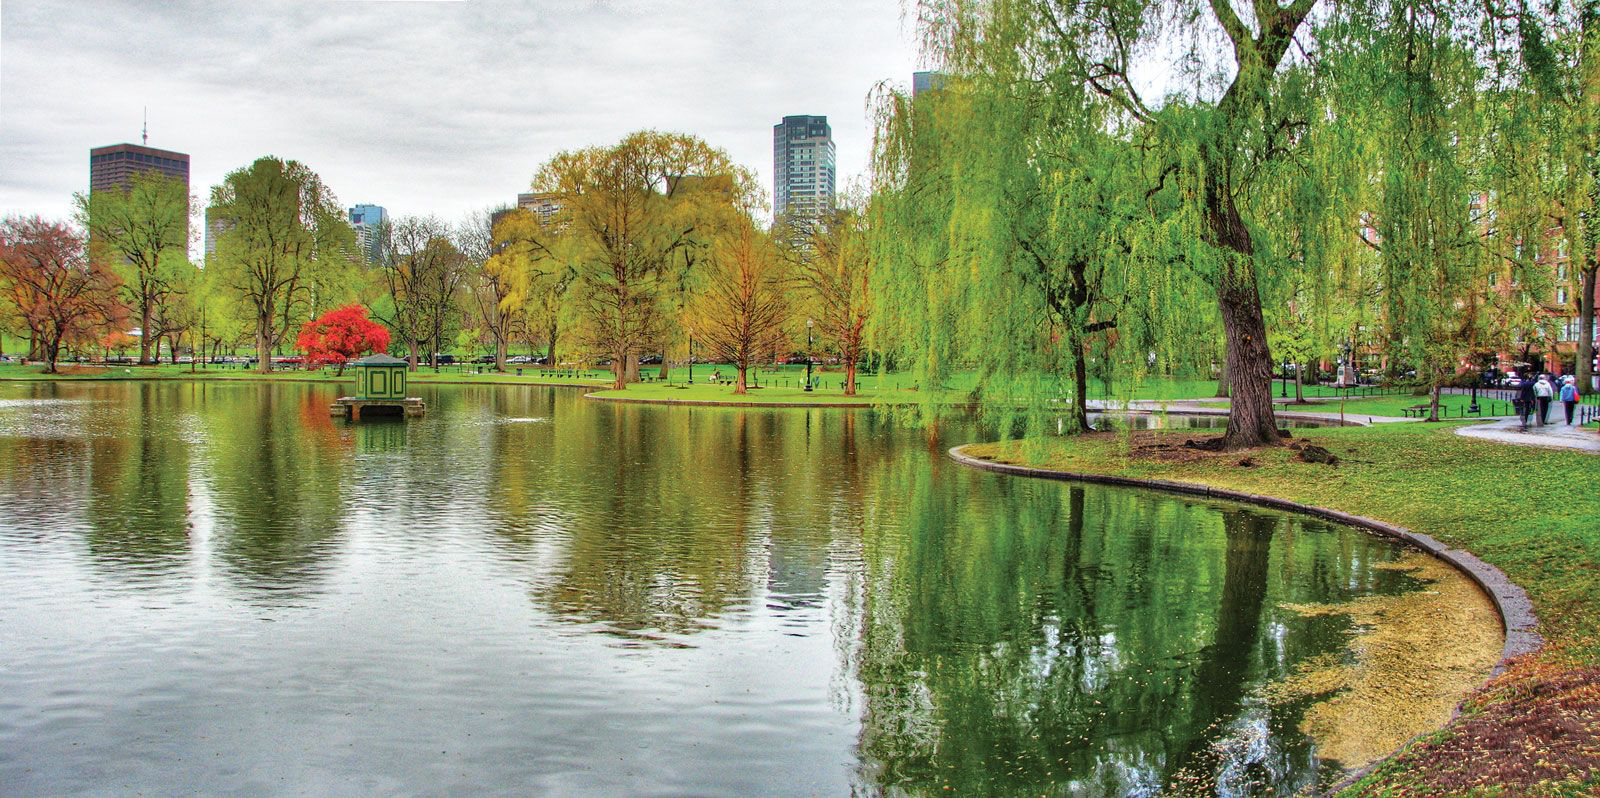

In [24]:
# load the img2
img2 = image.load_img('predict2.jpg')
img2

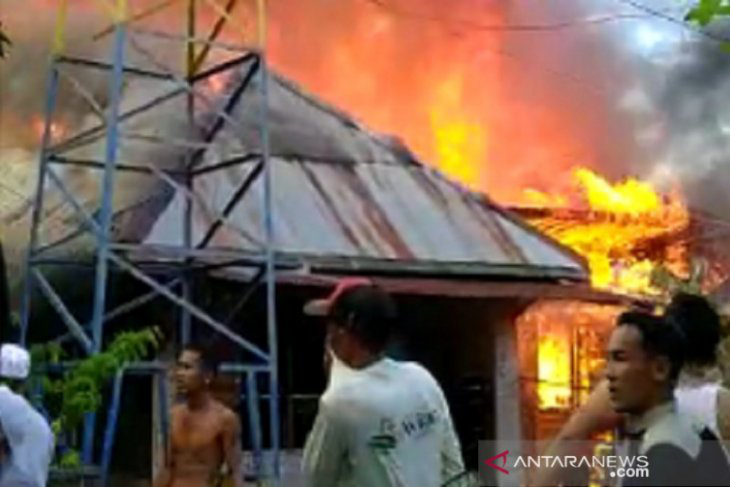

In [32]:
# load the img3
img3 = image.load_img('predict3.jpg')
img3

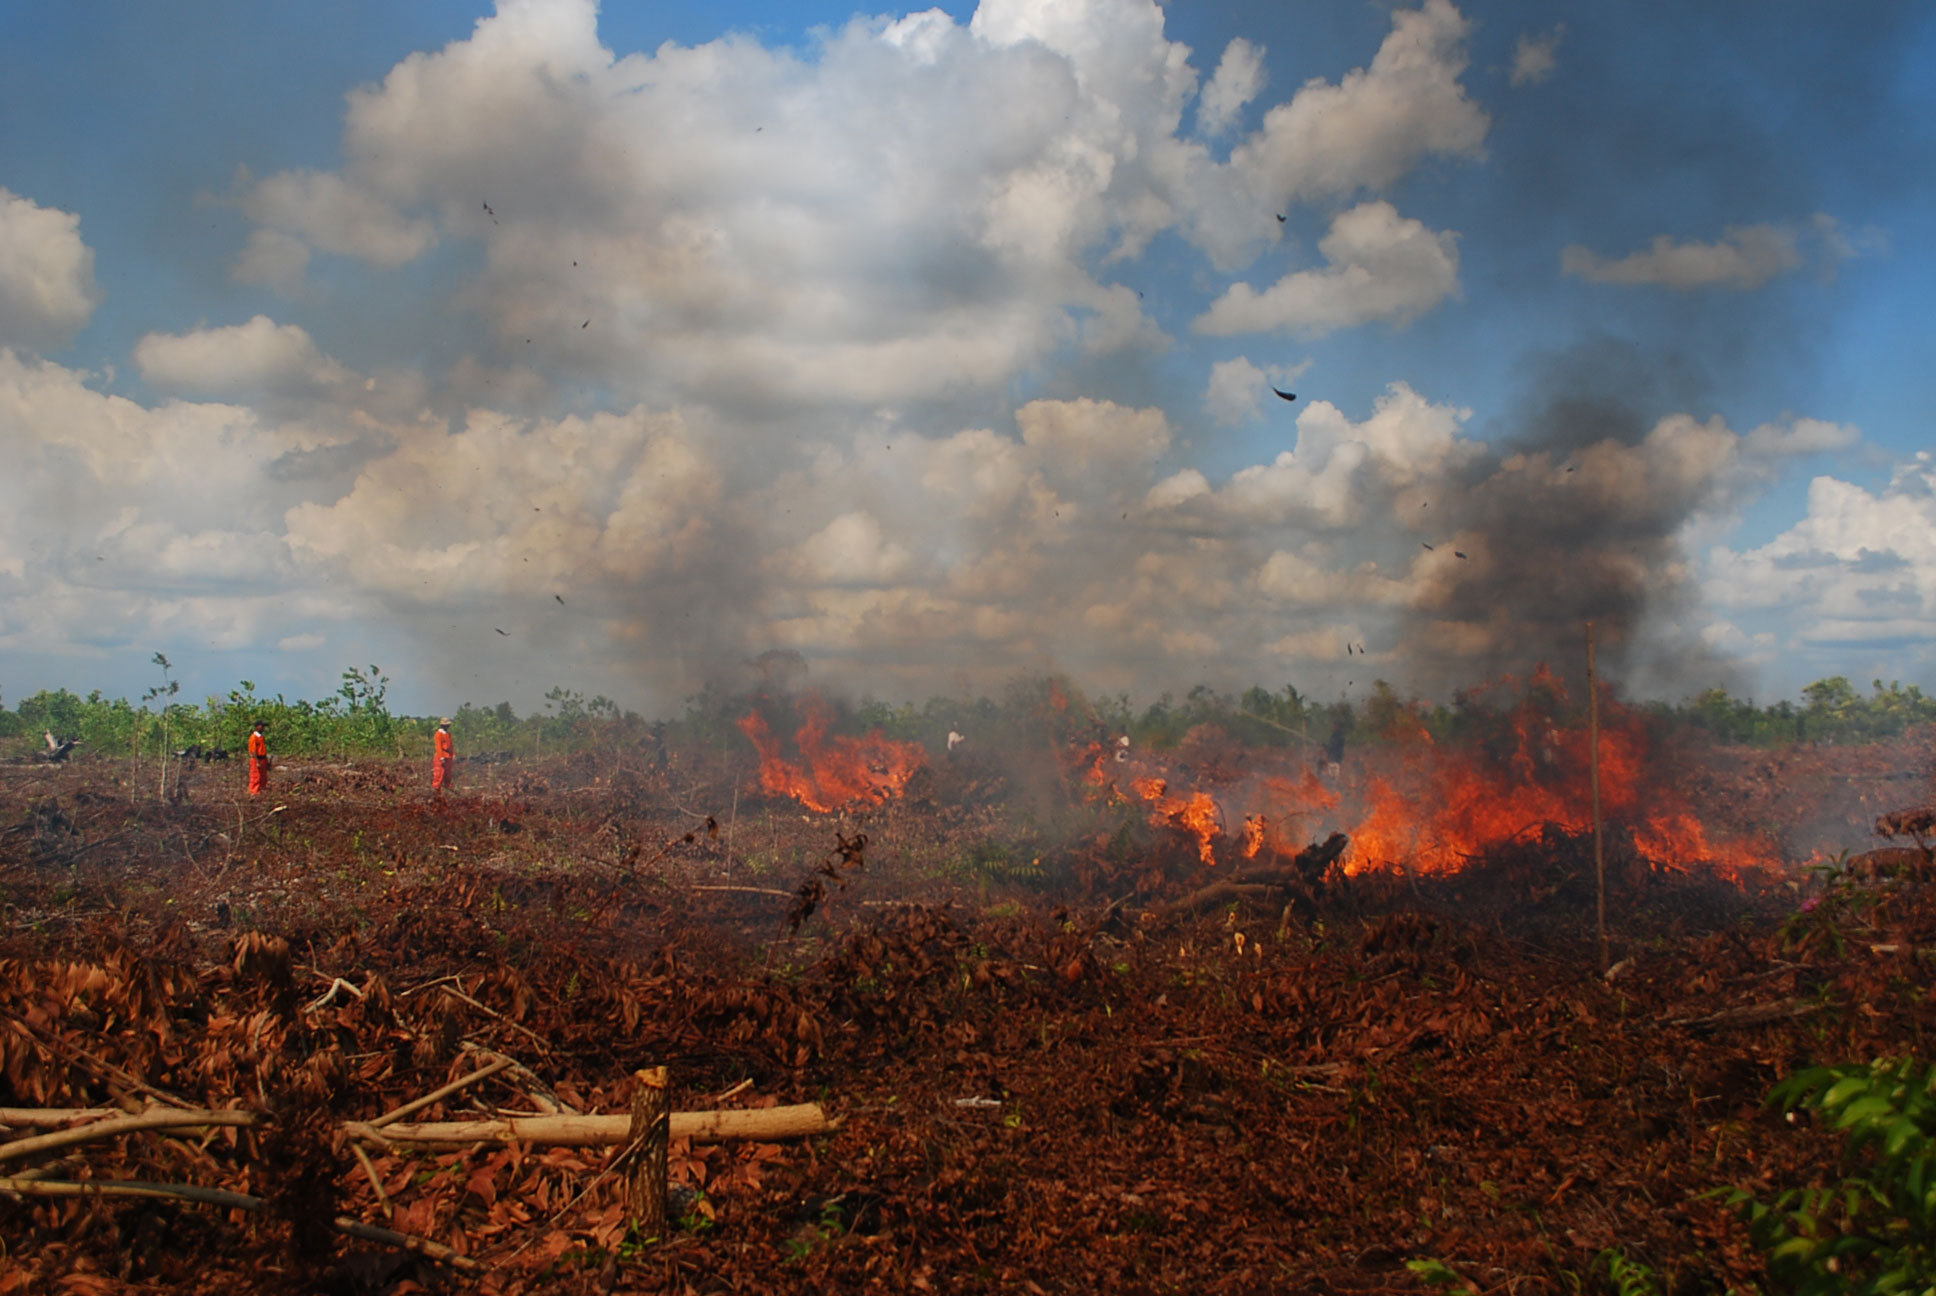

In [44]:
# load the img4
img4 = image.load_img('predict4.jpg')
img4

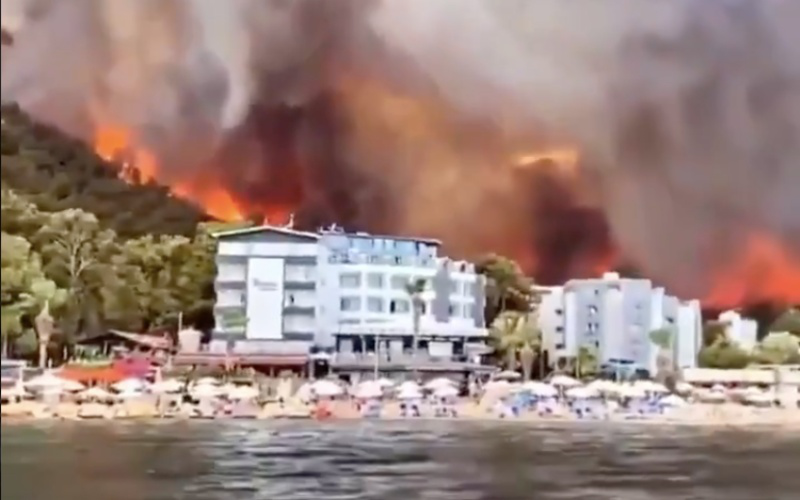

In [45]:
# load the img5
img5 = image.load_img('predict5.jpg')
img5

In [47]:
# Change the shape into 256x256
# Shape of img1
img1 = image.img_to_array(img1) / 255
img1 = tf.image.resize(img1, (256,256))
img1 = tf.expand_dims(img1, axis=0)

# Shape of img2
img2 = image.img_to_array(img2) / 255
img2 = tf.image.resize(img2, (256,256))
img2 = tf.expand_dims(img2, axis=0)

# Shape of img3
img3 = image.img_to_array(img3) / 255
img3 = tf.image.resize(img3, (256,256))
img3 = tf.expand_dims(img3, axis=0)

# Shape of img4
img4 = image.img_to_array(img4) / 255
img4 = tf.image.resize(img4, (256,256))
img4 = tf.expand_dims(img4, axis=0)

# Shape of img5
img5 = image.img_to_array(img5) / 255
img5 = tf.image.resize(img5, (256,256))
img5 = tf.expand_dims(img5, axis=0)

print("Image 1 Shape", img2.shape)
print("Image 2 Shape", img2.shape)
print("Image 3 Shape", img2.shape)
print("Image 4 Shape", img2.shape)
print("Image 5 Shape", img2.shape)

Image 1 Shape (1, 256, 256, 3)
Image 2 Shape (1, 256, 256, 3)
Image 3 Shape (1, 256, 256, 3)
Image 4 Shape (1, 256, 256, 3)
Image 5 Shape (1, 256, 256, 3)


In this section, I convert the image into 1x256x256x3 size so that the uniform and model can more easily recognize it according to the training previously carried out.

In [53]:
# Applying model prediction
prediction1 = int(tf.round(impSequential.predict(x = img1)).numpy()[0][0])
prediction2 = int(tf.round(impSequential.predict(x = img2)).numpy()[0][0])
prediction3 = int(tf.round(impSequential.predict(x = img3)).numpy()[0][0])
prediction4 = int(tf.round(impSequential.predict(x = img4)).numpy()[0][0])
prediction5 = int(tf.round(impSequential.predict(x = img5)).numpy()[0][0])

# Function to convert value into string
def checkPrediction(value):
    if value == 0:
        return "fire"
    elif value == 1:
        return "non-fire"
    else:
        return "invalid value"

# Show the prediction
print('')
print('Image 1 Prediction : ', checkPrediction(prediction1))
print('Image 2 Prediction : ', checkPrediction(prediction2))
print('Image 3 Prediction : ', checkPrediction(prediction3))
print('Image 4 Prediction : ', checkPrediction(prediction4))
print('Image 5 Prediction : ', checkPrediction(prediction5))

1/1 [==============================] - 0s 290ms/step

Image 1 Prediction :  non-fire
Image 2 Prediction :  non-fire
Image 3 Prediction :  fire
Image 4 Prediction :  fire
Image 5 Prediction :  fire


In this prediction model, it can be said that the sequential improvement model can correctly predict the image where :

1. Figure 1 is an image of a park that is predicted to be non-fire by the model.
2. Figure 2 is an image of a park with a lake that is predicted to be non-fire by the model
3. Figure 3 is an image of a fire in a residential area that is predicted to fire by the model
4. Figure 4 is an image of a forest fire that is predicted to fire by the model
5. Figure 5 is an image of a fire behind a building that is predicted to fire by the model.

# **2 - Conclusion**

---

In this last section, it should contain conclusions that reflect the results obtained with the objectives that have been written in the introduction section.

From the previous data exploration and modeling, it can be concluded:

1. This image data is an imbalance where the fire category data amounts to 75.6% compared to non-fire with 24.4%.
2. Images with the fire category are mostly dominated by orange, gray with a brightness level that tends to be dark
3. Images with the non-fire category are dominated by green, white with a brightness level that tends to be bright.
4. From the color spectrum it can be seen, if the highest peak of the spectrum curve goes towards 100 then it can be said that the image tends to be dark and is categorized as fire, while if it is closer to 0 the highest peak on the curve then it can be said that the image tends to be bright and is categorized as non-fire.
5. The accuracy level in the sequential base model is 93% and has increased 3% to 96% in the sequential improvement model.
6. The model chosen is the Sequential Improvement model because in addition to having better performance, in terms of model size it is smaller than the basic sequential model.
7. The inference model proves that the Sequential Improvement model shows good performance where it can accurately predict the selected images.